In [1]:
import sys 
import os 
import pickle
import random
import numpy as np 
from astropy.io import fits
from astropy.coordinates import SkyCoord  
import astropy.units as u
import matplotlib.pylab as plt 
import pandas as pd 

plt.rc('text', usetex=True) # - Imperial cluster cannot find Latex
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
from configuration import get_config
CONFIG = get_config('KiDS-1000')

# Notes
Important columns identified in the catalogue.

## Positions on the sky
- ALPHA_J2000 (deg)
- DELTA_J2000 (deg)

## Ellipticities and Weights
- e1
- e2
- weight

## Flux
- FLUX_GAAP_u (count)
- FLUX_GAAP_g (count)
- FLUX_GAAP_r (count)
- FLUX_GAAP_i (count)
- FLUX_GAAP_Z (count)
- FLUX_GAAP_Y (count)
- FLUX_GAAP_J (count)
- FLUX_GAAP_H (count)
- FLUX_GAAP_Ks (count)

## Flux Errors
- FLUXERR_GAAP_u (count)
- FLUXERR_GAAP_g (count)
- FLUXERR_GAAP_r (count)
- FLUXERR_GAAP_i (count)
- FLUXERR_GAAP_Z (count)
- FLUXERR_GAAP_Y (count)
- FLUXERR_GAAP_J (count)
- FLUXERR_GAAP_H (count)
- FLUXERR_GAAP_Ks (count)

## Magnitude
- MAG_GAAP_u (mag)
- MAG_GAAP_g (mag)
- MAG_GAAP_r (mag)
- MAG_GAAP_i (mag)
- MAG_GAAP_Z (mag)
- MAG_GAAP_Y (mag)
- MAG_GAAP_J (mag)
- MAG_GAAP_H (mag)
- MAG_GAAP_Ks (mag)

## Magnitude Error
- MAGERR_GAAP_u (mag)
- MAGERR_GAAP_g (mag)
- MAGERR_GAAP_r (mag)
- MAGERR_GAAP_i (mag)
- MAGERR_GAAP_Z (mag)
- MAGERR_GAAP_Y (mag)
- MAGERR_GAAP_J (mag)
- MAGERR_GAAP_H (mag)
- MAGERR_GAAP_Ks (mag)

## Magnitude Limit
- MAG_LIM_u (mag)
- MAG_LIM_g (mag)
- MAG_LIM_r (mag)
- MAG_LIM_i (mag)
- MAG_LIM_Z (mag)
- MAG_LIM_Y (mag)
- MAG_LIM_J (mag)
- MAG_LIM_H (mag)
- MAG_LIM_Ks (mag)

## Flag (all of them 0)
- FLAG_GAAP_u
- FLAG_GAAP_g
- FLAG_GAAP_r
- FLAG_GAAP_i
- FLAG_GAAP_Z
- FLAG_GAAP_Y
- FLAG_GAAP_J
- FLAG_GAAP_H
- FLAG_GAAP_Ks

## BPZ
- M_0 (reference magnitude for BPZ prior)
- Z_B (9 band BPZ redshift estimate - peak of posterior)
- Z_ML (9 band BPZ maximum likelihood redshift)
- Z_B_MIN (lower bound of the 68% confidence interval of Z_B)
- Z_B_MAX (upper bound of the 68% confidence interval of Z_B)

# Plot Objects on the Sky

We have chosen the first 500 000 objects in the catalogue. Takes a long time to plot all the samples. 

In [3]:
fits_image = fits.open('./data/catalogue/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits')
data = fits_image[1].data
fits_image.close()

## Redshifts

In [4]:
rednames = ['Z_B', 'Z_ML']
redshifts = np.asarray([data[rednames[i]] for i in range(len(rednames))]).T
df_redshifts = pd.DataFrame(redshifts, columns = rednames, dtype = np.float16)

In [5]:
df_redshifts.head()

,Z_B,Z_ML
0,0.709961,0.070007
1,0.439941,0.439941
2,1.080078,1.089844
3,0.540039,0.700195
4,1.009766,1.030273


## Names 

In [6]:
names = np.asarray(data['THELI_NAME'], dtype = str)
df_names = pd.DataFrame(names, columns = ['THELI_NAME'])

## Fluxes

In [7]:
fluxes = np.asarray([data[CONFIG.colnames.flux[i]] for i in range(CONFIG.nband)]).T
df_flux = pd.DataFrame(fluxes, columns=CONFIG.colnames.flux, dtype=np.float32)

In [8]:
df_flux.head()

,FLUX_GAAP_u,FLUX_GAAP_g,FLUX_GAAP_r,FLUX_GAAP_i,FLUX_GAAP_Z,FLUX_GAAP_Y,FLUX_GAAP_J,FLUX_GAAP_H,FLUX_GAAP_Ks
0,1.056200e-11,1.392500e-10,1.615300e-10,2.616000e-10,316.019989,557.820007,221.858902,905.090027,924.590027
1,6.060100e-11,8.435300e-10,4.170800e-09,7.162000e-09,11010.000000,14520.000000,18281.925781,24005.000000,27658.000000
2,1.579000e-10,3.678500e-10,6.326800e-10,8.714600e-10,1914.500000,1557.099976,2037.095947,2146.000000,5169.600098
3,2.215500e-10,1.250500e-10,2.747600e-10,2.562200e-10,474.690002,890.419983,382.773987,2217.699951,856.369995
4,1.051100e-10,2.209900e-10,5.564200e-10,1.192700e-09,2096.135986,2520.406494,4021.867676,6219.298828,9032.557617


## Flux Error

In [9]:
flux_err_names = [f'FLUXERR_GAAP_{f}' for f in CONFIG.band]
flux_err = np.asarray([data[flux_err_names[i]] for i in range(CONFIG.nband)]).T
df_flux_err = pd.DataFrame(flux_err, columns=flux_err_names, dtype=np.float32)

In [10]:
df_flux_err.head()

,FLUXERR_GAAP_u,FLUXERR_GAAP_g,FLUXERR_GAAP_r,FLUXERR_GAAP_i,FLUXERR_GAAP_Z,FLUXERR_GAAP_Y,FLUXERR_GAAP_J,FLUXERR_GAAP_H,FLUXERR_GAAP_Ks
0,6.540000e-11,2.810000e-11,3.120000e-11,7.300000e-11,161.000000,381.000000,424.805298,1030.000000,943.000000
1,7.250000e-11,3.210000e-11,3.710000e-11,8.580000e-11,178.000000,428.000000,481.546692,1200.000000,1100.000000
2,6.910000e-11,3.020000e-11,3.450000e-11,8.000000e-11,170.000000,407.000000,455.338013,1130.000000,1030.000000
3,6.620000e-11,2.860000e-11,3.220000e-11,7.520000e-11,164.000000,390.000000,382.330353,1060.000000,971.000000
4,5.290000e-11,2.640000e-11,2.930000e-11,6.770000e-11,120.152008,280.437103,275.078003,886.384155,702.218994


## Magnitude

In [11]:
mag = np.asarray([data[CONFIG.colnames.mag[i]] for i in range(CONFIG.nband)]).T
df_mag = pd.DataFrame(mag, columns=CONFIG.colnames.mag, dtype=np.float16)

In [12]:
df_mag.head()

,MAG_GAAP_u,MAG_GAAP_g,MAG_GAAP_r,MAG_GAAP_i,MAG_GAAP_Z,MAG_GAAP_Y,MAG_GAAP_J,MAG_GAAP_H,MAG_GAAP_Ks
0,99.00000,24.546875,24.421875,23.921875,23.718750,23.093750,24.109375,22.59375,22.578125
1,99.00000,22.593750,20.890625,20.328125,19.859375,19.562500,19.328125,19.03125,18.890625
2,24.40625,23.500000,22.937500,22.625000,21.750000,21.984375,21.703125,21.65625,20.703125
3,24.03125,24.671875,23.843750,23.953125,23.265625,22.593750,23.515625,21.62500,22.656250
4,24.81250,24.031250,23.062500,22.265625,21.640625,21.453125,20.968750,20.50000,20.093750


In [13]:
df_mag.max()

MAG_GAAP_u     99.0
MAG_GAAP_g     99.0
MAG_GAAP_r     99.0
MAG_GAAP_i     99.0
MAG_GAAP_Z     99.0
MAG_GAAP_Y     99.0
MAG_GAAP_J     99.0
MAG_GAAP_H     99.0
MAG_GAAP_Ks    99.0
dtype: float16

In [14]:
df_mag.min()

MAG_GAAP_u     17.062500
MAG_GAAP_g     17.859375
MAG_GAAP_r     16.796875
MAG_GAAP_i     16.343750
MAG_GAAP_Z     15.851562
MAG_GAAP_Y     15.664062
MAG_GAAP_J     14.992188
MAG_GAAP_H     14.015625
MAG_GAAP_Ks    15.734375
dtype: float16

## Magnitude Error

In [15]:
magerr_names = [f'MAGERR_GAAP_{f}' for f in CONFIG.band]
magerr = np.asarray([data[magerr_names[i]] for i in range(CONFIG.nband)]).T
df_magerr = pd.DataFrame(magerr, columns = magerr_names, dtype=np.float16)

In [16]:
df_magerr.head()

,MAGERR_GAAP_u,MAGERR_GAAP_g,MAGERR_GAAP_r,MAGERR_GAAP_i,MAGERR_GAAP_Z,MAGERR_GAAP_Y,MAGERR_GAAP_J,MAGERR_GAAP_H,MAGERR_GAAP_Ks
0,6.722656,0.219116,0.209717,0.302979,0.553223,0.741699,2.078125,1.235352,1.107422
1,1.298828,0.041321,0.009659,0.013008,0.017548,0.032013,0.028595,0.054260,0.043182
2,0.475098,0.089111,0.059204,0.099670,0.096436,0.283691,0.242676,0.571777,0.216309
3,0.324463,0.248291,0.127197,0.318604,0.375000,0.475586,1.084961,0.519043,1.231445
4,0.546387,0.129761,0.057159,0.061615,0.062225,0.120789,0.074280,0.154785,0.084412


## Extinction

In [66]:
ext_names = [f'EXTINCTION_{f}' for f in CONFIG.band]
extinction = np.asarray([data[ext_names[i]] for i in range(CONFIG.nband)]).T
df_ext = pd.DataFrame(extinction, columns = ext_names, dtype=np.float16)

In [67]:
df_ext.head()

,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,EXTINCTION_Z,EXTINCTION_Y,EXTINCTION_J,EXTINCTION_H,EXTINCTION_Ks
0,0.130981,0.102051,0.070618,0.052460,0.039032,0.033661,0.021866,0.013885,0.009300
1,0.131714,0.102600,0.070984,0.052765,0.039246,0.033844,0.021988,0.013962,0.009354
2,0.131958,0.102844,0.071167,0.052856,0.039337,0.033905,0.022034,0.013992,0.009369
3,0.132568,0.103271,0.071411,0.053101,0.039490,0.034058,0.022125,0.014046,0.009407
4,0.162598,0.126709,0.087646,0.065125,0.048431,0.041779,0.027145,0.017227,0.011543


## Magnitude Limit

In [68]:
mag_lim_names = [f'MAG_LIM_{f}' for f in CONFIG.band]
mag_lim = np.asarray([data[mag_lim_names[i]] for i in range(CONFIG.nband)]).T
df_mag_lim = pd.DataFrame(mag_lim, columns = mag_lim_names, dtype=np.float16)

In [69]:
df_mag_lim.head()

,MAG_LIM_u,MAG_LIM_g,MAG_LIM_r,MAG_LIM_i,MAG_LIM_Z,MAG_LIM_Y,MAG_LIM_J,MAG_LIM_H,MAG_LIM_Ks
0,25.500000,26.390625,26.281250,25.359375,24.484375,23.546875,23.421875,22.468750,22.562500
1,25.390625,26.250000,26.093750,25.187500,24.375000,23.421875,23.296875,22.296875,22.390625
2,25.437500,26.312500,26.171875,25.265625,24.421875,23.468750,23.359375,22.375000,22.468750
3,25.484375,26.375000,26.250000,25.328125,24.468750,23.515625,23.546875,22.437500,22.531250
4,25.734375,26.453125,26.343750,25.453125,24.796875,23.875000,23.906250,22.625000,22.890625


# Error Functions
- normal
- erf
- erfc

In [21]:
from scipy.special import erf, erfc
from scipy.stats import norm

In [22]:
grid = np.linspace(-5, 5, 1000)
dist = norm(0, 1)
ypdf = dist.pdf(grid)
yerf = erf(grid)
yerfc = erfc(grid)

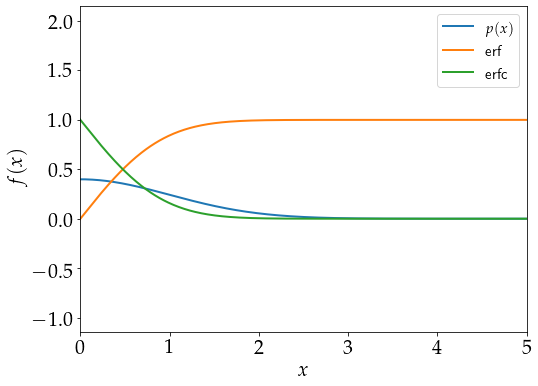

In [56]:
plt.figure(figsize=(8,6))
plt.plot(grid, ypdf, lw=2, label = r'$p(x)$')
plt.plot(grid, yerf, lw=2, label = 'erf')
plt.plot(grid, yerfc, lw=2, label = 'erfc')
plt.ylabel(r'$f(x)$', fontsize = fontSize)
plt.xlabel(r'$x$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.xlim(0,5)
plt.show()

Example of magnitude with mean = 99 and error = 6.722656. 

Some relations between the cumulative distribution function, $\Phi$ and the error function, $\texttt{erf}$ (and complementary error function, $\texttt{erfc}$) are given below:

$$\texttt{erf}(x)=2\Phi(\sqrt{2}x)-1$$

$$\texttt{erfc}(x)=2\Phi_{c}(\sqrt{2}x)$$

where $\Phi_{c}(x)=1-\Phi(x)$ or we can simply use the relation $\texttt{erfc}(x)=1 - \texttt{erf}(x)$.

In [58]:
value = 99
error = 6.722656
mag_dist = norm(value, error)
mag_grid = np.linspace(15, value + 5*error, 1000)
mag_pdf = mag_dist.pdf(mag_grid)
mag_cdf = mag_dist.cdf(mag_grid)

In [59]:
mag_erf = 2 * mag_dist.cdf(np.sqrt(2) * mag_grid) - 1
mag_erfc = 1 - mag_erf

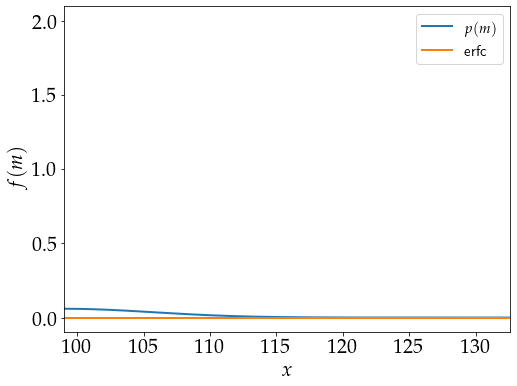

In [61]:
plt.figure(figsize=(8,6))
plt.plot(mag_grid, mag_pdf, lw=2, label = r'$p(m)$')
# plt.plot(mag_grid, mag_erf, lw=2, label = 'erf')
plt.plot(mag_grid, mag_erfc, lw=2, label = 'erfc')
plt.ylabel(r'$f(m)$', fontsize = fontSize)
plt.xlabel(r'$x$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.xlim(value, max(mag_grid))
plt.show()

In [70]:
f_example = df_flux.iloc[0].values
ferr_example = df_flux_err.iloc[0].values

mag_example = df_mag.iloc[0].values
magerr_example = df_magerr.iloc[0].values

maglim_example = df_mag_lim.iloc[0].values

In [71]:
fcorr = np.copy(f_example)
ferrcorr = np.copy(ferr_example)

In [72]:
fcorr[4:] *= 1E-12
ferrcorr[4:] *= 1E-12

In [73]:
f_example

array([1.056200e-11, 1.392500e-10, 1.615300e-10, 2.616000e-10,
       3.160200e+02, 5.578200e+02, 2.218589e+02, 9.050900e+02,
       9.245900e+02], dtype=float32)

In [74]:
ferr_example

array([6.540000e-11, 2.810000e-11, 3.120000e-11, 7.300000e-11,
       1.610000e+02, 3.810000e+02, 4.248053e+02, 1.030000e+03,
       9.430000e+02], dtype=float32)

In [75]:
fcorr

array([1.056200e-11, 1.392500e-10, 1.615300e-10, 2.616000e-10,
       3.160200e-10, 5.578200e-10, 2.218589e-10, 9.050900e-10,
       9.245900e-10], dtype=float32)

In [76]:
ferrcorr

array([6.540000e-11, 2.810000e-11, 3.120000e-11, 7.300000e-11,
       1.610000e-10, 3.810000e-10, 4.248053e-10, 1.030000e-09,
       9.430000e-10], dtype=float32)

In [77]:
mag_example

array([99.  , 24.55, 24.42, 23.92, 23.72, 23.1 , 24.11, 22.6 , 22.58],
      dtype=float16)

In [78]:
magerr_example

array([6.723 , 0.2191, 0.2097, 0.303 , 0.553 , 0.7417, 2.078 , 1.235 ,
       1.107 ], dtype=float16)

In [79]:
maglim_example

array([25.5 , 26.39, 26.28, 25.36, 24.48, 23.55, 23.42, 22.47, 22.56],
      dtype=float16)

In [55]:
ferrcorr/fcorr

array([6.192009  , 0.20179532, 0.19315298, 0.279052  , 0.50946146,
       0.683016  , 1.9147544 , 1.1380084 , 1.0199115 ], dtype=float32)

In [64]:
index = 0
value = fcorr[index]
error = ferrcorr[index]
flux_dist = norm(value, error)
flux_grid = np.linspace(value - 5*error, value + 5*error, 1000)
flux_pdf = flux_dist.pdf(flux_grid)
flux_cdf = flux_dist.cdf(flux_grid)
flux_erf = 2 * flux_dist.cdf(np.sqrt(2) * flux_grid) - 1
flux_erfc = 1 - flux_erf

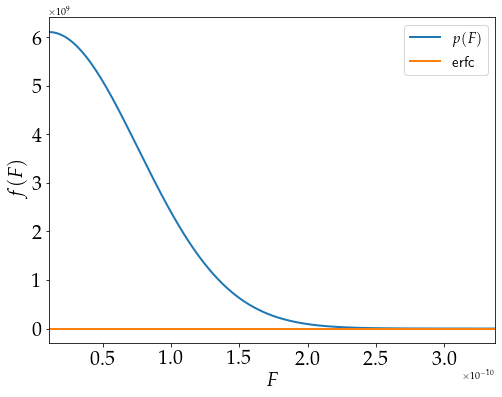

In [65]:
plt.figure(figsize=(8,6))
plt.plot(flux_grid, flux_pdf, lw=2, label = r'$p(F)$')
# plt.plot(flux_grid, flux_erf, lw=2, label = 'erf')
plt.plot(flux_grid, flux_erfc, lw=2, label = 'erfc')
plt.ylabel(r'$f(F)$', fontsize = fontSize)
plt.xlabel(r'$F$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.xlim(value, max(flux_grid))
plt.show()

## Condition 1 

All values of magnitude should be less than the magnitude limit. If all the values of magnitude is less than the magnitude limit, then we keep that row (and is denoted by a 1). 

In [22]:
condition_1 = np.sum((df_mag.values < df_mag_lim.values)*1, axis = 1)
condition_1 = (condition_1 == 9) * 1 

## Apply Corrections

In [163]:
test_mag = df_mag[condition_1 == 1].values
test_mag_err = df_magerr[condition_1 == 1].values
test_flux = df_flux[condition_1 == 1].values
test_flux_err = df_flux_err[condition_1 == 1].values
test_ext = df_ext[condition_1 == 1].values
test_names = df_names[condition_1 == 1].values.reshape(-1)
test_redshifts = df_redshifts[condition_1 == 1].values

In [186]:
test_mag.shape[0]

14674588

In [187]:
df_mag.shape[0]

21262011

In [191]:
print(f'Fraction of data being used is: {test_mag.shape[0]/df_mag.shape[0]:.3f}')

Fraction of data being used is: 0.690


In [204]:
def calculate_corrections(magnitudes, magnitudes_error, flux, flux_error, extinction, names, redshifts):
    unique_names = np.unique(names)
    nunique = len(unique_names)
    print(f'Number of patches is: {nunique}')
    patches = dict()
    for i in range(5):
        record = dict()
        patch = names == unique_names[i]
        record['magnitudes'] = magnitudes[patch] - extinction[patch]
        record['magnitudes_err'] = magnitudes_error[patch]
        scaled_magnitude = magnitudes[patch] + 2.5 * np.log10(flux[patch])
        correction = 10**(0.4*extinction[patch]) * 10**(-0.4 * np.median(scaled_magnitude, axis = 0))
        record['flux_corr'] = flux[patch] * correction
        record['flux_err_corr'] = flux_error[patch] * correction
        record['redshifts'] = redshifts[patch]
        patches[unique_names[i]] = record
    return patches

In [ ]:
patches = calculate_corrections(test_mag, test_mag_err, test_flux, test_flux_err, test_ext, test_names, test_redshifts)

In [176]:
patches.keys()

dict_keys(['KIDS_0p0_m28p2', 'KIDS_0p0_m29p2', 'KIDS_0p0_m30p2', 'KIDS_0p0_m31p2', 'KIDS_0p0_m32p1'])

In [193]:
# import utils.helpers as hp
# hp.pickle_save(patches, './', 'testing')

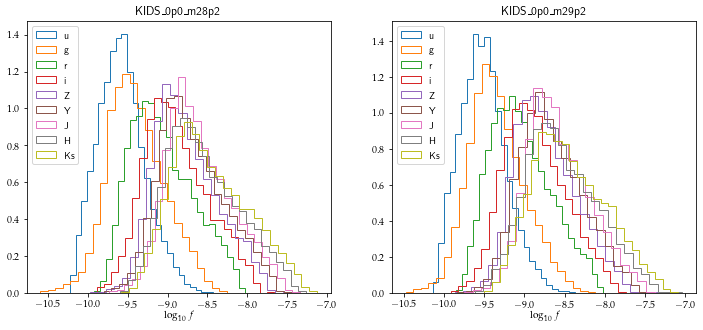

In [197]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.title('KIDS\_0p0\_m28p2')
for i in range(9):
    plt.hist(np.log10(patches['KIDS_0p0_m28p2']['flux_corr'][:,i]), density = True, bins=25, histtype='step', label = CONFIG.band[i])
plt.xlabel(r'$\textrm{log}_{10}\;f$')
plt.legend()
plt.subplot(122)
plt.title('KIDS\_0p0\_m29p2')
for i in range(9):
    plt.hist(np.log10(patches['KIDS_0p0_m29p2']['flux_corr'][:,i]), density = True, bins=25, histtype='step', label = CONFIG.band[i])
plt.xlabel(r'$\textrm{log}_{10}\;f$')    
plt.legend()
plt.show()

# Position on Sky

In [ ]:
xarr, yarr = data['ALPHA_J2000'], data['DELTA_J2000']
nobjects = 1000000
idx = random.sample(range(len(xarr)), nobjects)
eq = SkyCoord(xarr[idx], yarr[idx], unit=u.deg)
gal = eq.galactic
colors = np.random.random((nobjects, 3))

In [ ]:
plt.figure(figsize = (12, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=10, c=colors, alpha=0.6, edgecolors=colors, rasterized=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('plots/skymap.pdf', bbox_inches = 'tight')
plt.show()

# Processing

Process the data in such as way that we have 6 files stored 

- flux 
- flux errors 
- magnitude
- magnitude error 
- BPZ 
- meta data 

We can process the whole data and this will be stored in data/processed or we can take a subset of $N$ galaxies and these will be stored in data/sets.

In [2]:
from src.processing import cleaning 

In [ ]:
fits_image = fits.open('data/catalogue/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits')

# cleaning  (done once)
# whole_data = cleaning(fits_image, save = True, folder = 'data/processed')

print('-'*50)
for i in range(5):
    set_galaxies = cleaning(fits_image, save = True, ngalaxies = 100, folder = f'data/sets/set_{i+1}')
    print('-'*50)

fits_image.close()

# Tomography

In [2]:
from src.stackz import stack_fitting, stack_predictions
import utils.helpers as hp

In [26]:
BANDWIDTH = 0.05

### Fitting

In [27]:
## Done Once (because the KDEs are then stored)
bpz_redshifts = hp.pickle_load('data/processed', 'bpz')['Z_B']
kdes = stack_fitting(bpz_redshifts.values, save=True, bandwidth=BANDWIDTH, ngalaxies=100000)

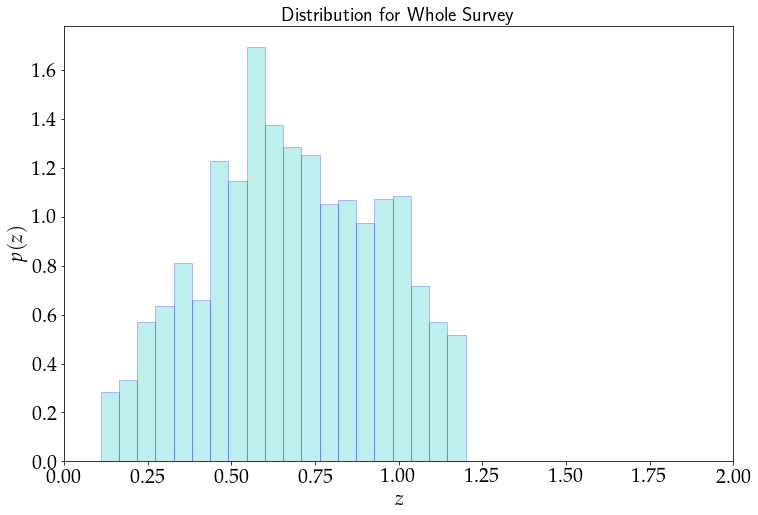

In [40]:
plt.figure(figsize = (12, 8))
plt.title('Distribution for Whole Survey', fontsize=fontSize)
plt.hist(bpz_redshifts, density = True, bins = 20, color='c', edgecolor='b', alpha=0.25)
plt.ylabel(r'$p(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0.0, 2.0)
# plt.savefig('plots/KiDS_1000_full_survey_distribution.pdf', bbox_inches = 'tight')
plt.show()

### Prediction - Smooth Distribution

In [28]:
redshift_range = np.linspace(0, 2, 1000)
smooth_pdf = stack_predictions(redshift_range, bandwidth=BANDWIDTH, save = False, fname = None)

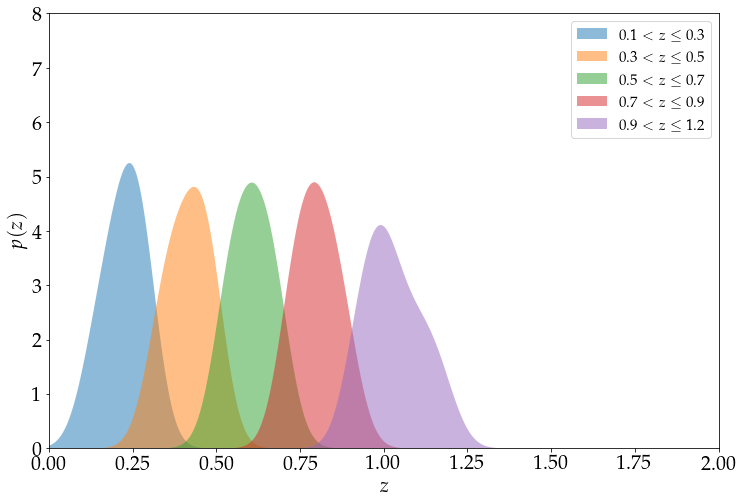

In [29]:
plt.figure(figsize = (12, 8))
plt.fill_between(redshift_range, smooth_pdf['h1'], alpha=0.5, label = r'$0.1<z\leq 0.3$')
plt.fill_between(redshift_range, smooth_pdf['h2'], alpha=0.5, label = r'$0.3<z\leq 0.5$')
plt.fill_between(redshift_range, smooth_pdf['h3'], alpha=0.5, label = r'$0.5<z\leq 0.7$')
plt.fill_between(redshift_range, smooth_pdf['h4'], alpha=0.5, label = r'$0.7<z\leq 0.9$')
plt.fill_between(redshift_range, smooth_pdf['h5'], alpha=0.5, label = r'$0.9<z\leq 1.2$')
plt.ylabel(r'$p(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.ylim(0.0, 8.0)
plt.xlim(0.0, 2.0)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
# plt.savefig(f'plots/stack_redshift_{BANDWIDTH}.pdf', bbox_inches = 'tight')
plt.show()

### Prediction - KiDS-1000 Mid-Redshifts

In [30]:
# load the fits file
data_tables = fits.open('data/cosmology/kids_1000.fits')

# extract the n(z) distribution
nofz = data_tables['NZ_SOURCE'].data

# get the redshifts
z_mid = np.concatenate((np.zeros(1), nofz['Z_MID']))

In [31]:
kids_pdf = stack_predictions(z_mid, bandwidth=BANDWIDTH, save = True, fname = f'kids_1000_{BANDWIDTH}')

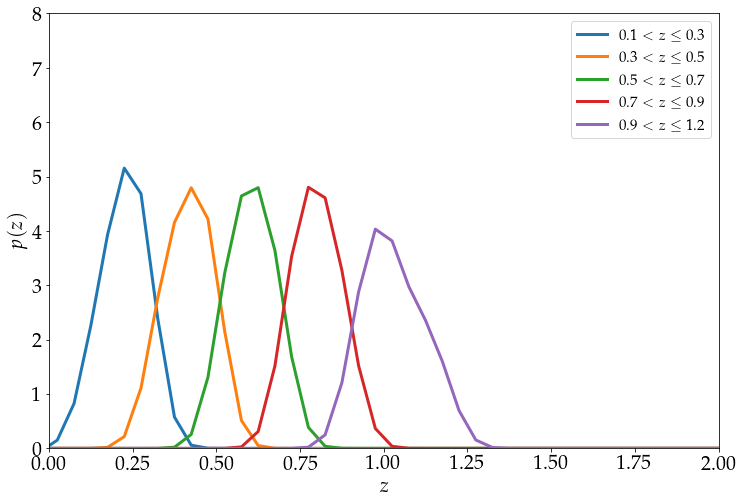

In [32]:
plt.figure(figsize=(12,8))
plt.plot(z_mid, kids_pdf['h1'], lw = 3, label = r'$0.1<z\leq 0.3$')
plt.plot(z_mid, kids_pdf['h2'], lw = 3, label = r'$0.3<z\leq 0.5$')
plt.plot(z_mid, kids_pdf['h3'], lw = 3, label = r'$0.5<z\leq 0.7$')
plt.plot(z_mid, kids_pdf['h4'], lw = 3, label = r'$0.7<z\leq 0.9$')
plt.plot(z_mid, kids_pdf['h5'], lw = 3, label = r'$0.9<z\leq 1.2$')
plt.ylabel(r'$p(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0.0, 2.0)
plt.ylim(0.0, 8.0)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
# plt.savefig(f'plots/kids_1000_{BANDWIDTH}.pdf', bbox_inches = 'tight')
plt.show()

In [33]:
def testing(a, b, **kwargs):
    
    print('Value' in kwargs)
    print(kwargs.values())
    
    val = kwargs.pop('value')
    ans = a + b + val 
    return ans 

In [34]:
testing(2, 3, value = 10)

False
dict_values([10])


15